<a href="https://colab.research.google.com/github/Trip1ewhy/Duke_xAI_Wayne/blob/main/Assignment_02_Wayne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AIPI 590 - XAI | Assignment #02
### Adversarial Attacks (Adversarial Patches)
Instructions
Create your own adversarial patch. We will use the Torchvision ResNet34 model trained on a small version of ImageNet to test your patch. You will need to use a class from the imagenet_classes.txt file (see GitHub) for your patch.



torchvision.models.resnet34(weights='IMAGENET1K_V1')


In addition to creating your adversarial patch, you must apply some creative component to your patch. Here are some ideas, but this is open-ended:

“Disguise” the patch in a sticker, like they did in Brown, et.al.
“Disguise” your patch in something else (ie clothing, jewelry, accessories, household items)
Combine two patches into one and test the results (what happens?)
Send a secret message using a series of patches
### Wayne Yang
#### https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/51290060b5f29826b761f848f38d9514156082ce/Assignment%20%2302.ipynb


[![Open In Collab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/Trip1ewhy/Duke_xAI_Wayne/blob/51290060b5f29826b761f848f38d9514156082ce/Assignment%20%2302.ipynb)

In [1]:
!rm -r ./sample_data

In [2]:
# Please use this to connect your GitHub repository to your Google Colab notebook
# Connects to any needed files from GitHub and Google Drive
import os

# Remove Colab default sample_data


# Clone GitHub files to colab workspace
repo_name = "Duke_xAI_Wayne" # Change to your repo name
git_path = 'https://github.com/Trip1ewhy/Duke_xAI_Wayne.git' #Change to your path
!git clone "{git_path}"

# Install dependencies from requirements.txt file
#!pip install -r "{os.path.join(repo_name,'requirements.txt')}" #Add if using requirements.txt

# Change working directory to location of notebook
notebook_dir = 'Assignment #02_Wayne'
path_to_notebook = os.path.join(repo_name,notebook_dir)
%cd "{path_to_notebook}"
%ls

Cloning into 'Duke_xAI_Wayne'...
remote: Enumerating objects: 79, done.
remote: Counting objects: 100% (79/79), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 79 (delta 15), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (79/79), 33.91 MiB | 10.80 MiB/s, done.
Resolving deltas: 100% (15/15), done.
[Errno 2] No such file or directory: 'Duke_xAI_Wayne/Assignment #02_Wayne'
/content
Duke_xAI_Wayne/


In [6]:
!pip install torch torchvision adversarial-robustness-toolbox
#!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.0 MB/s eta 0:00:00


In [7]:
import torch
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
import torch.nn as nn
import numpy as np
from art.attacks.evasion import FastGradientMethod
from art.attacks.evasion import AdversarialPatch
from art.estimators.classification import PyTorchClassifier
from PIL import Image
import matplotlib.pyplot as plt
import torch.nn.functional as F
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import io



In [5]:
# Load the pre-trained ResNet34 model with ImageNet weights
evalmodel = models.resnet34(weights='IMAGENET1K_V1')

# Set the model to evaluation mode since we won't be training it
evalmodel.eval()


Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 156MB/s]


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

### Get Dataset from imageNet

In [6]:
df = pd.read_parquet("/content/Duke_xAI_Wayne/Assignment #02/tench.parquet")

# check data
print(df.head())


                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0


In [7]:
# Extract the data about tench
df_label_0 = df[df['label'] == 0]

# check first several rows
print(df_label_0.head())
print(len(df_label_0))
#df_label_0.to_parquet("/content/Duke_xAI_Wayne/Assignment #02/filename.parquet")

                                               image  label
0  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
1  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
2  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
3  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
4  {'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x...      0
1300


In [8]:
# Load ImageNet classes from the file
with open('/content/Duke_xAI_Wayne/Assignment #02/imagenet_classes.txt') as f:
    classes = [line.strip() for line in f.readlines()]

# Select a target class, which we want the model to misunderstand
target_class = "tench"
target_class_index = classes.index(target_class)

# Print the target class and its index
print(f"Target class: {target_class}, Index: {target_class_index}")


Target class: tench, Index: 0


In [9]:
#verify index 0 is tench:
print(classes[0])

tench


## Use ART to generate Adversarial Patches
references: Duke-AI-XAI/adversarial-ai-example-notebooks
/in_class_adversarial_activity.ipynb



Prepare the dataset

In [13]:
# Custom Dataset Class for Converting Filtered Pandas Dataset to PyTorch-Compatible Dataset
class ParquetDataset(Dataset):
    def __init__(self, data_frame, transform=None):
        self.data = data_frame
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        # get image's bytes
        image_bytes = self.data.iloc[idx]['image']['bytes']
        image = Image.open(io.BytesIO(image_bytes)).convert('RGB')
        label = self.data.iloc[idx]['label']  # get label

        if self.transform:
            image = self.transform(image)

        return image, label

transform = transforms.Compose([
    transforms.Resize((500, 500)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 归一化
])

# load dataset
dataset = ParquetDataset(data_frame=df_label_0, transform=transform)

dataloader = DataLoader(dataset, batch_size=100, shuffle=True)

# check data
images, labels = next(iter(dataloader))
#print(images, labels)



In [14]:
images[0]
print("Tensor shape:", images[0].shape)

Tensor shape: torch.Size([3, 500, 500])


In [15]:
model = models.resnet34(weights='IMAGENET1K_V1')
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [24]:
def generate_adversarial_patch(model, dataloader, patch_shape=(3, 500, 500), target_label=0, learning_rate=0.5, max_iter=100, epochs=10):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)

    classifier = PyTorchClassifier(
        model=model,
        loss=nn.CrossEntropyLoss(),
        input_shape=(3, 500, 500),
        nb_classes=1000,
        clip_values=(0, 1),
        device_type=device.type
    )

    # define attack
    attack = AdversarialPatch(
        classifier=classifier,
        patch_shape=patch_shape,
        learning_rate=learning_rate,
        max_iter=max_iter
    )

    for epoch in range(epochs):
        print(f"Epoch {epoch+1}/{epochs}")

        # get different images data in different epoch
        images, labels = next(iter(dataloader))

        target_labels = torch.full_like(labels, target_label).to(device)
        print(target_labels)
        #generate patch
        adversarial_patch = attack.generate(x=images.cpu().numpy(), y=target_labels.cpu().numpy())

        #Check if the patch is of type tuple and retrieve the first element.
        if isinstance(adversarial_patch, tuple):
            adversarial_patch = adversarial_patch[0]

        # check the size of patch
        print("Adversarial patch shape:", adversarial_patch.shape)

        # Transfer to tensor
        adversarial_patch = torch.tensor(adversarial_patch).to(device)
        adversarial_patch = adversarial_patch.cpu().numpy()  #transfer to numpy array

    return adversarial_patch

In [25]:
# generate A.patch
adversarial_patch = generate_adversarial_patch(model, dataloader)

Epoch 1/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 2/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 3/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 4/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 5/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 6/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 7/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 8/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 9/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)
Epoch 10/10
tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0], device='cuda:0')


Adversarial Patch PyTorch:   0%|          | 0/100 [00:00<?, ?it/s]

Adversarial patch shape: (3, 500, 500)


In [26]:
#adversarial_patch[0].ndim

In [27]:
type(adversarial_patch)

numpy.ndarray

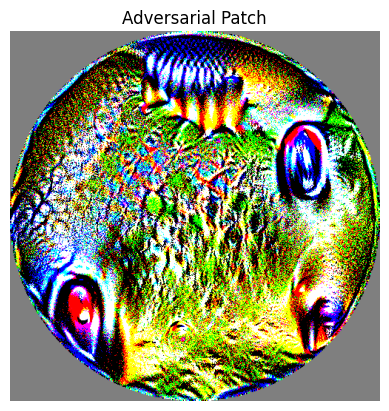

In [28]:
patch_data = np.clip(adversarial_patch, 0, 1)  # limit the value to [0,1]

# check the shape of the patch
#print("Patch data shape before transpose:", patch_data.shape)

#  patch_data is (channels, height, width), need to change to (height, width, channels)
if patch_data.shape[0] == 3:
    patch_data = np.transpose(patch_data, (1, 2, 0))  # 转换为 (height, width, channels)

#print("Patch data shape after transpose:", patch_data.shape)

# increase quality
patch_data_uint8 = (patch_data * 255).astype(np.uint8)

# create RGB image
image_patch = Image.fromarray(patch_data_uint8, 'RGB')

# show image
plt.imshow(image_patch)
plt.axis('off')
plt.title("Adversarial Patch")
plt.show()

#save image
image_patch = image_patch.resize((200, 200))
image_patch.save("/content/Duke_xAI_Wayne/Assignment #02/adversarial_patch.jpg", quality=95)

In [29]:
image_patch.size

(200, 200)

Test patch

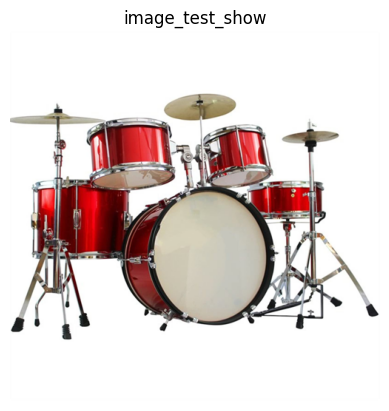

Top 10 predicted classes and probabilities for the test image:
Class 541 with probability 0.7134803533554077
Class 542 with probability 0.13796062767505646
Class 822 with probability 0.03781585022807121
Class 494 with probability 0.007268624380230904
Class 642 with probability 0.004717451520264149
Class 577 with probability 0.0043734339997172356
Class 819 with probability 0.0039039961993694305
Class 641 with probability 0.002456681802868843
Class 650 with probability 0.0020801653154194355
Class 420 with probability 0.0018352194456383586


In [32]:
image_path_test = '/content/Duke_xAI_Wayne/Assignment #02/Drum_test1.jpg'
#image_test = Image.open(image_path_test)
#image_test = transform(image_test).squeeze(0)  # 添加 batch 维度
image_test = Image.open(image_path_test)
image_test = image_test.resize((500, 500))
# Show the image directly using plt.imshow
plt.imshow(image_test)
plt.title("image_test_show")
plt.axis('off')
plt.show()
transform = transforms.Compose([
    transforms.Resize((500, 500)),  # Adjust size as required by your model
    transforms.ToTensor(),  # Convert PIL image to Tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Use ImageNet normalization if using a pre-trained model
])

# Apply the transformation to the image
image_test_change = transform(image_test).unsqueeze(0)  # Add batch dimension

# Pass the image through the model and compute the output
with torch.no_grad():
    outputs = evalmodel(image_test_change)  # Get logits (unnormalized scores)

# Convert logits to probabilities using softmax
probabilities = F.softmax(outputs, dim=1)

# Get the top 10 predicted classes and their probabilities
topk = 10  # Top 10 predicted classes
topk_probabilities, topk_indices = probabilities.topk(topk, dim=1, largest=True, sorted=True)

# Print the top 10 classes and their probabilities
print(f"Top {topk} predicted classes and probabilities for the test image:")
for i in range(topk):
    print(f"Class {topk_indices[0][i].item()} with probability {topk_probabilities[0][i].item()}")

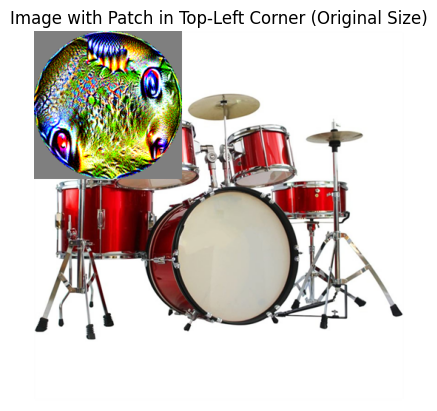

Top 10 predicted classes and probabilities for the test image with patch:
Class 541 with probability 0.5940089225769043
Class 542 with probability 0.13892117142677307
Class 822 with probability 0.04425091668963432
Class 577 with probability 0.013048265129327774
Class 494 with probability 0.00968853011727333
Class 819 with probability 0.008721807040274143
Class 641 with probability 0.007335079368203878
Class 632 with probability 0.005130631383508444
Class 642 with probability 0.0049265967682003975
Class 650 with probability 0.004119369201362133


In [33]:

#image_path_test = '/content/Duke_xAI_Wayne/Assignment #02/Drum_test2.jpg'  # 替换为你自己的图片路径
#image_test = Image.open(image_path_test)



#image_patch = Image.open("/path/to/your/adversarial_patch.jpg")  # 替换为实际路径

#test_image_size = image_test.size  # (width, height)
#patch_size = image_patch.size  # 对抗性补丁的大小

# paste patch to the image
image_test = image_test.convert('RGB')
image_patch = image_patch.convert('RGB')
image_test.paste(image_patch, (0, 0))

# show image
plt.imshow(image_test)
plt.title("Image with Patch in Top-Left Corner (Original Size)")
plt.axis('off')
plt.show()


transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为 PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 使用 ImageNet 标准化
])

# change to tensor
image_test_change = transform(image_test).unsqueeze(0)

# calculate possibility
with torch.no_grad():
    outputs = evalmodel(image_test_change)

# calculate softmax possibility distribution
probabilities = F.softmax(outputs, dim=1)

# first 10 categories

topk = 10  #
topk_probabilities, topk_indices = probabilities.topk(topk, dim=1, largest=True, sorted=True)


print(f"Top {topk} predicted classes and probabilities for the test image with patch:")
for i in range(topk):
    print(f"Class {topk_indices[0][i].item()} with probability {topk_probabilities[0][i].item()}")


# Finally This Patch successfully hacked the resnet34！！！#

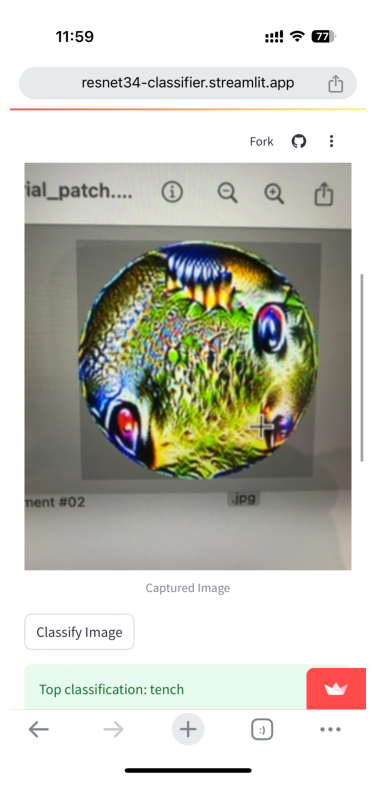

In [8]:
image_path = '/content/Duke_xAI_Wayne/Assignment #02/Result.jpg'

# open the image
img = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

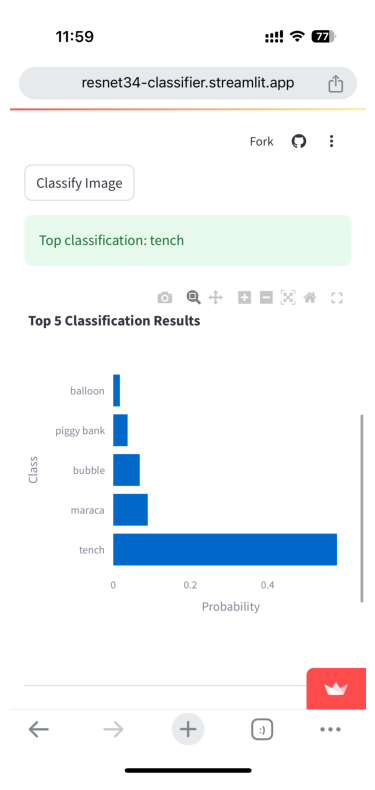

In [9]:
image_path = '/content/Duke_xAI_Wayne/Assignment #02/Result 2.jpg'

# open the image
img = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()

## Creative  ##
I used several of this patch to make a desktop wallpaper for my computer.
It's like making a point not to look at my screen >_<


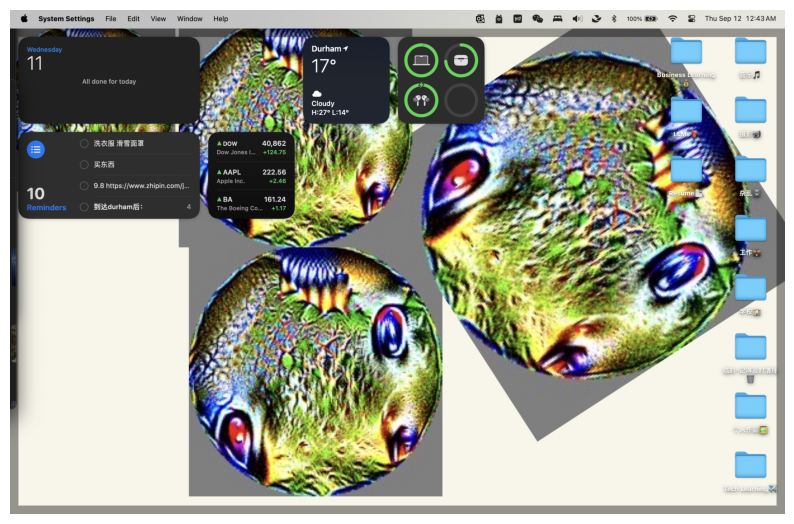

In [6]:
image_path = '/content/Duke_xAI_Wayne/Assignment #02/creative wallpaper.jpg'

# open the image
img = Image.open(image_path)
plt.figure(figsize=(10, 10))
plt.imshow(img)
plt.axis('off')
plt.show()